In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, roc_curve
from IPython.display import Markdown as md
import matplotlib.pyplot as plt

## Load Data

### Ground Truth

In [2]:
gt_path = 'C:\\Users\\obarn\\Projects\\F-MT126-1\\vilio\\data\\features\\annotations\\gt'

In [3]:
# Ground truth
gt_dev = pd.read_json(os.path.join(gt_path, 'dev_all.jsonl'), lines=True)
gt_ts = pd.read_json(os.path.join(gt_path, 'test_seen.jsonl'), lines=True)
gt_tu = pd.read_json(os.path.join(gt_path, 'test_unseen.jsonl'), lines=True)
gt_test = gt_ts.append(gt_tu)
dev_or = {'Correct': gt_dev}

### Model Outputs

In [4]:
paths = ['C:\\Users\\obarn\\Projects\\F-MT126-1\\vilio\\data\\outputs\\v3\\mean']

In [5]:
# Load data
dev, test = [], []
experiments = []
for path in tqdm(paths):
    for csv in sorted(os.listdir(path)):
        if ".csv" in csv and "test" in csv:
            exp = csv.split('_')[0]
            experiments.append(exp)            
            dev.append(pd.read_csv(os.path.join(path, f'{exp}_dev.csv')))
            test.append(pd.read_csv(os.path.join(path, f'{exp}_test.csv')))

#dev_or.update(dev)
dev = pd.concat(dev, axis=1)
test = pd.concat(test, axis=1)

100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


## Display

### Dev

In [6]:
scores = {}
for exp in dev.keys():
    scores[exp]=roc_auc_score(gt_dev.label, dev[exp])
    
out = '| 1 | 5 | 10 | 15 | 20 | 36 | 50 | 72 |\n'
out += '| --- | --- | --- | --- | --- | --- | --- | --- |\n'
for model in ['U', 'O', 'D', 'X']:   
    for flag in ['', 'a', 'c', 'ac']:
        row = [f'{scores.get(f"{model}{num}{flag}m")}' for num in [1, 5, 10, 15, 20, 36, 50, 72]]
        out += f'{" | ".join(row)} |\n'
md(out)

| 1 | 5 | 10 | 15 | 20 | 36 | 50 | 72 |
| --- | --- | --- | --- | --- | --- | --- | --- |
0.7331437813559148 | 0.7686126649565782 | 0.776205045791225 | 0.7775133665049293 | 0.7937901123919605 | 0.7816752686178158 | 0.7827672528355534 | 0.7738768530251053 |
0.7294248539728652 | 0.7624213204767643 | 0.7778945308073473 | 0.7873618279403736 | 0.7887937695089162 | 0.7869703619000524 | 0.7864037663153773 | 0.7869600601621494 |
0.7162798364084022 | 0.7724140062428532 | 0.7889482955774638 | 0.782293372892007 | 0.7823963902710387 | 0.7826745371944247 | 0.7801403096702415 | None |
0.7176705710253319 | 0.7650585653799796 | 0.7773794439121879 | 0.7828084597871661 | 0.7806966035170133 | 0.7908953240411656 | 0.782015225968621 | None |
0.6940692894891368 | 0.7603300676824181 | 0.771229306383987 | 0.7676443015936789 | 0.7710335733638265 | 0.770497882992861 | 0.7709202542468914 | 0.7640077881138548 |
0.6848698375415933 | 0.7587126948316181 | 0.7675206807388406 | 0.7716207724243082 | 0.7707863316541501 | 0.7734750852468811 | 0.7779357377589601 | 0.7729806018275284 |
0.6856424678843321 | 0.7614735605896715 | 0.7714868498315666 | 0.7703021499727003 | 0.7680254658960967 | 0.773804740859783 | 0.770394865613829 | None |
0.680161943319838 | 0.7530673424606731 | 0.7647907201944969 | 0.7685302510533527 | 0.7774000473879945 | 0.7776472890976708 | 0.7783787124887969 | None |
0.6756806873319529 | 0.728683128843836 | 0.747864964819565 | 0.7466596614848925 | 0.743672157492969 | 0.7452689268679626 | 0.7439915113679678 | 0.753170359839705 |
0.6747741343964726 | 0.7194012629930668 | 0.7434352175211958 | 0.7506361323155216 | 0.7435176314244213 | 0.7369348209042865 | 0.7492144924848823 | 0.7513160470171318 |
0.6700765419126206 | 0.7443108652429664 | 0.7529025146542222 | 0.7542520423195394 | 0.7548804483316335 | 0.760505197226772 | 0.7555294578195342 | None |
0.6649874833884476 | 0.7274366185575506 | 0.7521916947389025 | 0.7426213802268442 | 0.7459900485211856 | 0.7700446065251207 | 0.7593514025816155 | None |
0.6314965334651955 | 0.6831288438359551 | 0.7054321063963491 | 0.7086565503600457 | 0.704298915226999 | 0.7018058946544281 | 0.6997455470737913 | 0.7115307352350342 |
0.6295701084773002 | 0.6967992500334806 | 0.6977161047068641 | 0.7085329295052075 | 0.7196175994890338 | 0.7084711190777885 | 0.7103460353761679 | 0.723429242513212 |
0.6297246345458479 | 0.6875997980859372 | 0.6944401520536514 | 0.705421804658446 | 0.7040001648278064 | 0.7057308567955414 | 0.7018367998681377 | None |
0.629559806739397 | 0.6849007427553028 | 0.7069670653439235 | 0.7012496008076563 | 0.7065755993036026 | 0.7015277477310422 | 0.7124887968600302 | None |


### Test

In [33]:
scores = {}
for exp in test.keys():
    scores[exp]=roc_auc_score(gt_test.label, test[exp])
    
out = '| 1 | 5 | 10 | 15 | 20 | 36 | 50 | 72 |\n'
out += '| --- | --- | --- | --- | --- | --- | --- | --- |\n'
for model in ['U', 'O', 'D', 'X']:   
    for flag in ['', 'a', 'c', 'ac']:
        row = [f'{scores.get(f"{model}{num}{flag}m")}' for num in [1, 5, 10, 15, 20, 36, 50, 72]]
        out += f'{" | ".join(row)} |\n'
md(out)

| 1 | 5 | 10 | 15 | 20 | 36 | 50 | 72 |
| --- | --- | --- | --- | --- | --- | --- | --- |
0.7261235337243402 | 0.7929971590909091 | 0.7946856671554251 | 0.791702254398827 | 0.7960373900293255 | 0.7984934017595308 | 0.798163947947214 | 0.789562866568915 |
0.7200664406158358 | 0.7802167338709678 | 0.7904916605571848 | 0.7919515212609971 | 0.7923015945747801 | 0.7946531341642228 | 0.7937587060117302 | 0.7911780608504398 |
0.7295408724340177 | 0.7923680351906158 | 0.7998680351906159 | 0.8013407258064515 | 0.8047960960410557 | 0.8067082111436951 | 0.8023946114369501 | None |
0.7231020894428153 | 0.7821050219941349 | 0.7970798203812317 | 0.7950311583577713 | 0.7997736436950147 | 0.8005798662023461 | 0.803207478005865 | None |
0.7014910190615836 | 0.770893969941349 | 0.7780599340175953 | 0.7793580461876832 | 0.7829316348973607 | 0.7829197214076247 | 0.7886235337243402 | 0.787451887829912 |
0.6951539589442816 | 0.7598020527859237 | 0.7792948130498534 | 0.7799963343108505 | 0.7851310483870968 | 0.7916688049853372 | 0.7855150293255133 | 0.7913957111436949 |
0.7001273826979472 | 0.7722218658357771 | 0.7837353372434017 | 0.7922598973607038 | 0.7890510447214076 | 0.7892269978005865 | 0.7929893695014663 | None |
0.6953395344574781 | 0.7618227639296188 | 0.7804802052785924 | 0.7883536473607039 | 0.7924239369501467 | 0.793078262463343 | 0.7940918255131966 | None |
0.6985447214076246 | 0.7438228555718475 | 0.7510213526392963 | 0.760883431085044 | 0.7634943181818182 | 0.7681231671554252 | 0.7649381414956011 | 0.7713677602639297 |
0.6883715175953078 | 0.7290844941348973 | 0.7461565249266863 | 0.7528913123167156 | 0.7503871884164223 | 0.7465968658357771 | 0.7530681818181818 | 0.7596822305718475 |
0.6989598607038122 | 0.7473185483870968 | 0.7637820747800586 | 0.7643158907624634 | 0.769646719208211 | 0.7743241385630498 | 0.7703207478005865 | None |
0.6947305718475074 | 0.7444716825513196 | 0.7599372250733137 | 0.7622539406158357 | 0.7620555351906159 | 0.7704806634897361 | 0.7760167705278592 | None |
0.6579169721407624 | 0.7090904508797655 | 0.7212825329912023 | 0.7171792521994135 | 0.7230241935483871 | 0.7148879673753665 | 0.7214561950146627 | 0.724002474340176 |
0.6512839076246335 | 0.7084594941348974 | 0.7278761913489736 | 0.7255576429618769 | 0.7264523002199414 | 0.7292696114369501 | 0.7240313416422288 | 0.7284462060117302 |
0.6523932368035191 | 0.7102332294721407 | 0.7211326979472141 | 0.7219070747800587 | 0.7261872250733139 | 0.7212138013196481 | 0.7285346407624634 | None |
0.650032991202346 | 0.7183289039589442 | 0.7343177236070381 | 0.7315382148093841 | 0.7321792521994135 | 0.7358486070381232 | 0.7367379948680352 | None |


## AUROC Curves

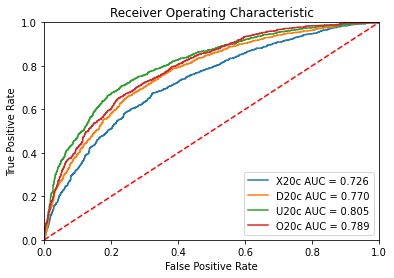

In [7]:
exps = ['X20cm', 'D20cm', 'U20cm', 'O20cm']
for exp in exps:
    fpr, tpr, threshold = roc_curve(gt_test.label, test[exp])
    score = roc_auc_score(gt_test.label, test[exp])
    plt.plot(fpr, tpr, label = f'{exp[:-1]} AUC = {score:.3f}')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()